In [finding slopes](finding_slopes), we found the line the did the best job of predicting one vector of values from another vector of values.

Our line was a slope and an intercept.  We used it to predict the Maternal Mortality Ratio (MMR) values from the Fertility Rate (FR) values.

We chose the line to minimize the average prediction errors, and the sum of squared prediction errors.

Now we may have another question.  Can we believe the slope?   Put more formally, is it possible that there is in fact no underlying positive or negative slope relating FR and MMR, and the slope that we found arose because of *sampling error*.  That is, there was some random fluctuation in the data, perhaps from year to year, and just by chance, the random fluctuation resulted in the slope we observe.

This is a very similar problem to the problem of comparing means between two groups.  Like that problem, we can get at our question using a permutation test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)
import pandas as pd

If you are running on your laptop, you will need to download the
[gender_stats.csv]({{ site.baseurl }}/data/gender_stats.csv) file to the same
directory as this notebook.

We fetch the data and process it again:

In [2]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

# Make new data frame with only MMR and FR
just_mmr_fr = gender_data[['mat_mort_ratio', 'fert_rate']]

# Drop the NaN values, and make into arrays.
clean_mmr_fr = just_mmr_fr.dropna()
mmr = np.array(clean_mmr_fr['mat_mort_ratio'])
fert = np.array(clean_mmr_fr['fert_rate'])

The function we want to minimize:

In [3]:
def sos_si_error(inter_slope):
    # inter_slope has two elements, the intercept value, and the slope value
    intercept = inter_slope[0]
    slope = inter_slope[1]
    fitted = intercept + fert * slope
    error = mmr - fitted
    return np.sum(error ** 2)

Find the best intercept and slope:

In [4]:
from scipy.optimize import minimize
observed_result = minimize(sos_si_error, [0, 100])
observed_result.x

array([-220.86,  140.42])

In [5]:
observed_slope = observed_result.x[1]
observed_slope

140.4171219816066

This is what we see, in the data we have.

What would we see, if we took another random sample of FR and MMR values?  We can't easily to this.  Is there a way we can estimate what this would look like?

We return to the permutation trick.  If there is, in fact, no straight-line relationship between MMR and FR, then the association of MMR and FR is just a result of random sampling.

We can simulate that random sampling by making a new, fake FR, MMR pairing.  We do this by shuffling the MMR (or FR) values, to make the relationship between them random.

Then we check what slope we get.

We keep doing this, and keep checking the slope, to build up the *sampling distribution* for the slope.

Then we compare our actual slope to the sampling distribution.  If the actual slope is not a rare value from the sampling distribution, the slope may have come about because of random sampling.  If it is a rare value, random sampling is an unlikely explanation.

In [6]:
# Store the original MMR values
actual_mmr = mmr.copy()

Now shuffle the MMR values, to make a fake pairing between the FR and MMR values.

In [7]:
# Make a fake pairing of FR and MMR, by shuffling MMR
np.random.shuffle(mmr)

Use `minimize` to estimate the best-fit slope for this new fake pairing:

In [8]:
# Estimate the slope for the fake pairing
fake_result = minimize(sos_si_error, [0, 100])
fake_result.x

array([152.61,  10.06])

Get the slope, as our first estimate from the sampling distribution:

In [9]:
fake_slope = fake_result.x[1]
fake_slope

10.060284900099676

We need to do this many times to build up a good estimate of the sampling distribution:

In [10]:
n_samples = 10000
fake_slopes = np.zeros(n_samples)
for i in np.arange(n_samples):
    np.random.shuffle(mmr)
    fake_slope = minimize(sos_si_error, [0, 100]).x[1]
    fake_slopes[i] = fake_slope

/Users/brettmz-admin/.virtualenvs/dsfe/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/brettmz-admin/.virtualenvs/dsfe/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/brettmz-admin/.virtualenvs/dsfe/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/brettmz-admin/.virtualenvs/dsfe/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/brettmz-admin/.virtualenvs/dsfe/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/brettmz-admin

As usual, we display the sampling distribution:

Text(0.5, 1.0, 'Sampling distribution for slope')

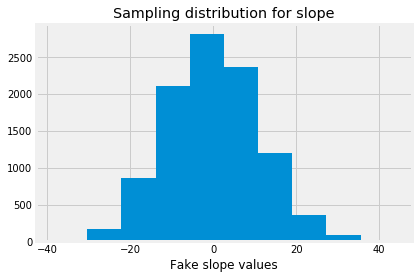

In [11]:
plt.hist(fake_slopes)
plt.xlabel('Fake slope values')
plt.title('Sampling distribution for slope')

We find the proportion of the sampling distribution that is greater than or equal to the value we saw:

In [12]:
p = np.count_nonzero(fake_slopes >= observed_slope) / n_samples
p

0.0

The observed slope is very unlikely, given the sampling distribution.  We conclude that the observed slope is unlikely to be the result of random sampling.